<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [31]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as smf
from statsmodels. formula.api import ols
import statsmodels.formula.api as smf


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


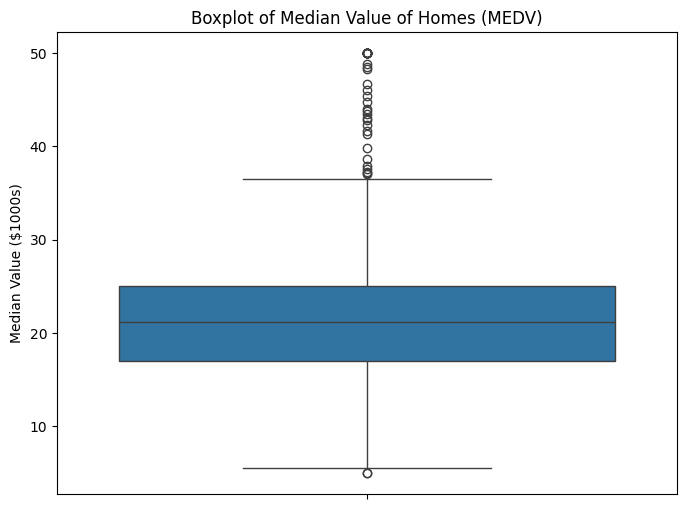

In [9]:
# Boxplot of MEDV
plt.figure(figsize=(8,6))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Homes (MEDV)")
plt.ylabel("Median Value ($1000s)")
plt.show()

<ipython-input-10-a15819b29e6f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CHAS', data=boston_df, palette='Set2')


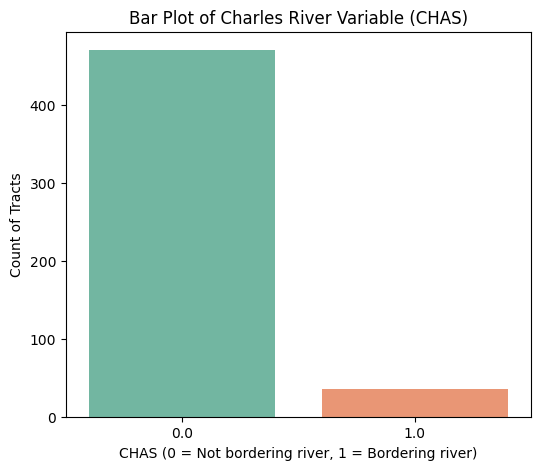

In [10]:
# Bar plot of CHAS
plt.figure(figsize=(6,5))
sns.countplot(x='CHAS', data=boston_df, palette='Set2')
plt.title("Bar Plot of Charles River Variable (CHAS)")
plt.xlabel("CHAS (0 = Not bordering river, 1 = Bordering river)")
plt.ylabel("Count of Tracts")
plt.show()

<ipython-input-15-689406e620cf>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='Set3')


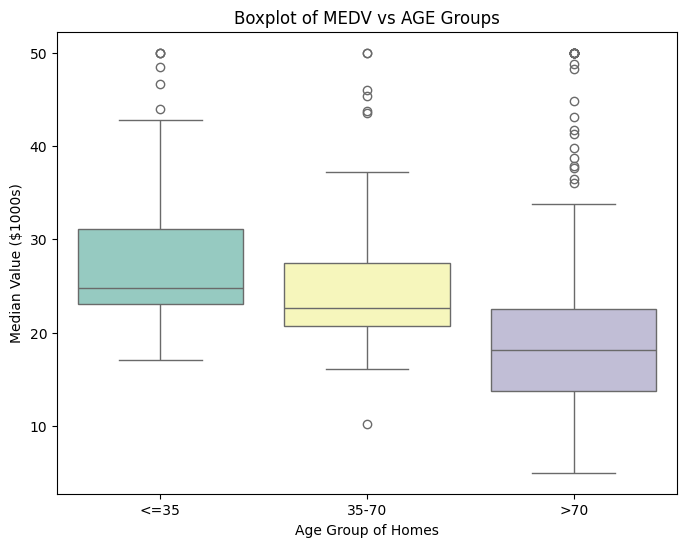

In [15]:
# Discretize AGE into groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'],
                                bins=[0, 35, 70, 100],
                                labels=['<=35', '35-70', '>70'])
# Boxplot of MEDV vs AGE groups
plt.figure(figsize=(8,6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df, palette='Set3')
plt.title("Boxplot of MEDV vs AGE Groups")
plt.xlabel("Age Group of Homes")
plt.ylabel("Median Value ($1000s)")
plt.show()

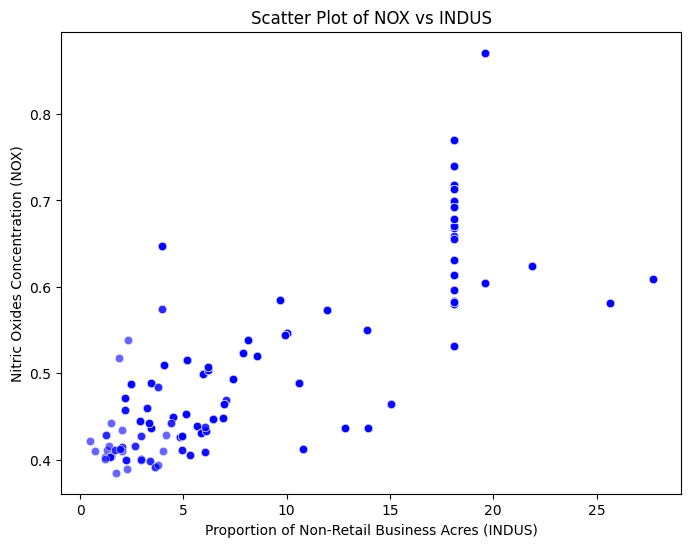

In [16]:
# Scatter plot of NOX vs INDUS
plt.figure(figsize=(8,6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='blue', alpha=0.6)
plt.title("Scatter Plot of NOX vs INDUS")
plt.xlabel("Proportion of Non-Retail Business Acres (INDUS)")
plt.ylabel("Nitric Oxides Concentration (NOX)")
plt.show()


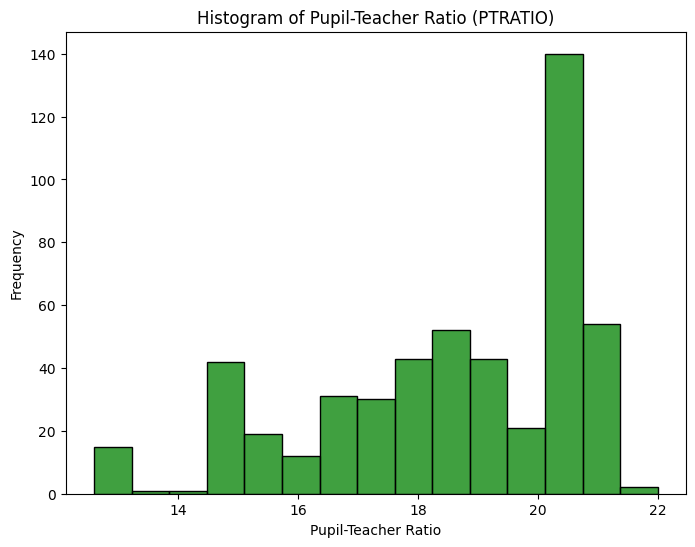

In [17]:
# Histogram of PTRATIO
plt.figure(figsize=(8,6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=False, color='green')
plt.title("Histogram of Pupil-Teacher Ratio (PTRATIO)")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

In [20]:
# Separate MEDV values for CHAS=0 and CHAS=1
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform independent samples t-test
t_stat, p_val = stats.ttest_ind(chas0, chas1)

print("Independent Samples T-test: CHAS vs MEDV")
print("t-statistic:", t_stat)
print("p-value:", p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Conclusion: Reject H0. There IS a significant difference in MEDV between CHAS=0 and CHAS=1.")
else:
    print("Conclusion: Fail to reject H0. No significant difference in MEDV between CHAS=0 and CHAS=1.")

Independent Samples T-test: CHAS vs MEDV
t-statistic: -3.996437466090509
p-value: 7.390623170519905e-05
Conclusion: Reject H0. There IS a significant difference in MEDV between CHAS=0 and CHAS=1.


In [21]:
# Discretize AGE into groups
boston_df['AGE_group'] = pd.cut(boston_df['AGE'],
                                bins=[0, 35, 70, 100],
                                labels=['<=35', '35-70', '>70'])

# Create groups
group1 = boston_df[boston_df['AGE_group'] == '<=35']['MEDV']
group2 = boston_df[boston_df['AGE_group'] == '35-70']['MEDV']
group3 = boston_df[boston_df['AGE_group'] == '>70']['MEDV']

# Perform ANOVA
f_stat, p_val = stats.f_oneway(group1, group2, group3)

print("One-way ANOVA: AGE groups vs MEDV")
print("F-statistic:", f_stat)
print("p-value:", p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Conclusion: Reject H0. There IS a significant difference in MEDV across AGE groups.")
else:
    print("Conclusion: Fail to reject H0. No significant difference in MEDV across AGE groups.")

One-way ANOVA: AGE groups vs MEDV
F-statistic: 36.40764999196599
p-value: 1.7105011022702984e-15
Conclusion: Reject H0. There IS a significant difference in MEDV across AGE groups.


In [22]:

# Pearson correlation between NOX and INDUS
r, p_val = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation: NOX vs INDUS")
print("Correlation coefficient (r):", r)
print("p-value:", p_val)

# Interpretation
alpha = 0.05
if p_val < alpha:
    print("Conclusion: Reject H0. There IS a significant linear relationship between NOX and INDUS.")
else:
    print("Conclusion: Fail to reject H0. No significant linear relationship between NOX and INDUS.")

Pearson Correlation: NOX vs INDUS
Correlation coefficient (r): 0.7636514469209192
p-value: 7.913361061210442e-98
Conclusion: Reject H0. There IS a significant linear relationship between NOX and INDUS.


In [32]:
# Regression model: MEDV ~ DIS
model = smf.ols("MEDV ~ DIS", data=boston_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 22 Nov 2025   Prob (F-statistic):           1.21e-08
Time:                        12:58:04   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0